In [6]:
'''Machine learnig with PCA & Logistic Regression'''

import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import pandas as pd
from matplotlib import style
style.use("ggplot")
from sklearn.linear_model import LogisticRegression
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import train_test_split
from sklearn import svm, preprocessing



FEATURES =  ['DE Ratio',
             'Trailing P/E',
             'Price/Sales',
             'Price/Book',
             'Profit Margin',
             'Operating Margin',
             'Return on Assets',
             'Return on Equity',
             'Revenue Per Share',
             'Market Cap',
             'Enterprise Value',
             'Forward P/E',
             'PEG Ratio',
             'Enterprise Value/Revenue',
             'Enterprise Value/EBITDA',
             'Revenue',
             'Gross Profit',
             'EBITDA',
             'Net Income Avl to Common ',
             'Diluted EPS',
             'Earnings Growth',
             'Revenue Growth',
             'Total Cash',
             'Total Cash Per Share',
             'Total Debt',
             'Current Ratio',
             'Book Value Per Share',
             'Cash Flow',
             'Beta',
             'Held by Insiders',
             'Held by Institutions',
             'Shares Short (as of',
             'Short Ratio',
             'Short % of Float',
             'Shares Short (prior ']

def Build_Data_Set(feat=FEATURES):
    data_df = pd.DataFrame.from_csv("key_stats.csv")

    data_df = data_df.reindex(np.random.permutation(data_df.index))
    data_df = data_df.replace('NaN',0).replace('N/A',0)
    #print data_df.head(20)
    
    X = np.array(data_df[feat].values)
    
    y = (data_df["Status"].replace("underperform",0).replace("outperform",1).values.tolist())
    X = preprocessing.scale(X)
    Z = np.array(data_df[["stock_p_change","sp500_p_change"]].values)
    #print X
    return X,y, Z


def Analysis_lgr():

    #test_size = 1000
    X, y, z = Build_Data_Set()
    print(len(X))
    
    Xlr, Xtestlr, ylr, ytestlr, zlr, ztestlr = train_test_split(X,y,z)
    clfl2=LogisticRegression()
    parameters = {"C": [0.001, 0.1, 1, 10,100]}
    fitmodel = GridSearchCV(clfl2, param_grid=parameters, cv=5, scoring="accuracy")
    fitmodel.fit(Xlr, ylr)
    fitmodel.best_estimator_, fitmodel.best_params_, fitmodel.best_score_, fitmodel.grid_scores_
    
    clfl2=LogisticRegression(C=fitmodel.best_params_['C'])
    clfl2.fit(Xlr, ylr)
    ypred2=clfl2.predict(Xtestlr)
    acc=accuracy_score(ypred2, ytestlr)
    #clf = svm.SVC(kernel="linear", C= 1.0)
    #clf.fit(X[:-test_size],y[:-test_size])
    
    return acc, fitmodel.best_estimator_, fitmodel.best_params_, fitmodel.best_score_, fitmodel.grid_scores_, ypred2, Xtestlr ,ytestlr, z 


#X, y = Build_Data_Set()

#acc, best_estimator_, best_params_, best_score_, grid_scores_, ypred2, Xtestlr, ytestlr, ztestlr =  Analysis_lgr()
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
%matplotlib inline

from sklearn.cross_validation import train_test_split
from sklearn.decomposition import PCA

'Machine learnig with SVM'

In [5]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
%matplotlib inline

from sklearn.cross_validation import train_test_split
from sklearn.decomposition import PCA

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'


In [68]:
def Build_Data_Set(feat=FEATURES):
    data_df = pd.DataFrame.from_csv("key_stats.csv")

    data_df = data_df.reindex(np.random.permutation(data_df.index))
    data_df = data_df.replace('NaN',0).replace('N/A',0)
    #print data_df.head(20)
    
    X = np.array(data_df[feat].values)
    
    y = (data_df["Status"].replace("underperform",0).replace("outperform",1).values.tolist())
    X = preprocessing.scale(X)
    Z = np.array(data_df[["stock_p_change","sp500_p_change"]].values)
    #print X
    return X,y, Z


def Analysis_lgr():

    #test_size = 1000
    X, y, z = Build_Data_Set()
    print(len(X))
    
    Xlr, Xtestlr, ylr, ytestlr, zlr, ztestlr = train_test_split(X,y,z)
    
def pca_(feat=FEATURES):
    X, y, z = Build_Data_Set()
    data_df = pd.DataFrame.from_csv("key_stats.csv")
    
    array_reduction = X
    n_com=len(feat)
    pca = PCA(n_components=n_com)
    pca.fit(array_reduction)
    #print(pca.explained_variance_ratio_)
    reduced = pca.fit_transform(array_reduction)

    #print (pca.components_)
    pca_fit = pca.fit(array_reduction)
    #reduced = pca.fit_transform(array_reduction)
    print (pca_fit.explained_variance_ratio_)
    p_var_arr=pca_fit.explained_variance_ratio_.cumsum()
    p_var_arr=pd.Series(p_var_arr)
    ay = p_var_arr.plot(kind = 'line', figsize = (10,3));
    ay.set(xlabel = '# components', ylabel = 'Explained variance',
      title = 'Explained variance vs. number of components');
    fig = plt.figure()
    fig.set_size_inches(11.7, 5);
    first_comp = abs(pca_fit.components_[0])
    ax = plt.bar(range(n_com), first_comp[0:n_com])
    _ = plt.xticks(np.arange(54) + 0.25, feat, rotation = 'vertical')
    _ = plt.ylabel('PCA component magnitude')
    _ = plt.title('First principal component')

    return ay,ax



[  1.76304320e-01   1.37988599e-01   7.57552398e-02   6.24995899e-02
   4.80459649e-02   4.64446264e-02   3.93274663e-02   3.81466563e-02
   3.50242678e-02   3.35935208e-02   3.07780090e-02   2.85363823e-02
   2.82883067e-02   2.73887233e-02   2.23325298e-02   2.20763203e-02
   2.02878332e-02   1.89587652e-02   1.76683700e-02   1.55213538e-02
   1.34805542e-02   1.23507467e-02   1.00186853e-02   8.81542812e-03
   7.99686730e-03   7.58449079e-03   5.05650024e-03   3.35103127e-03
   3.03678640e-03   2.30287652e-03   7.21784640e-04   2.62655619e-04
   5.47478255e-05   9.11222233e-34   9.11222233e-34]


(<matplotlib.axes._subplots.AxesSubplot at 0x11baaf190>,
 <Container object of 35 artists>)

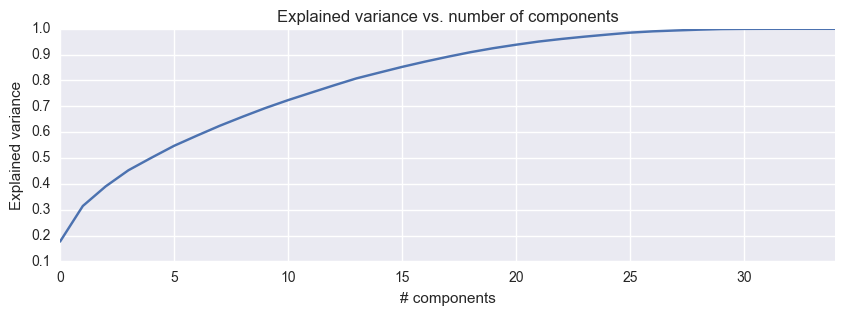

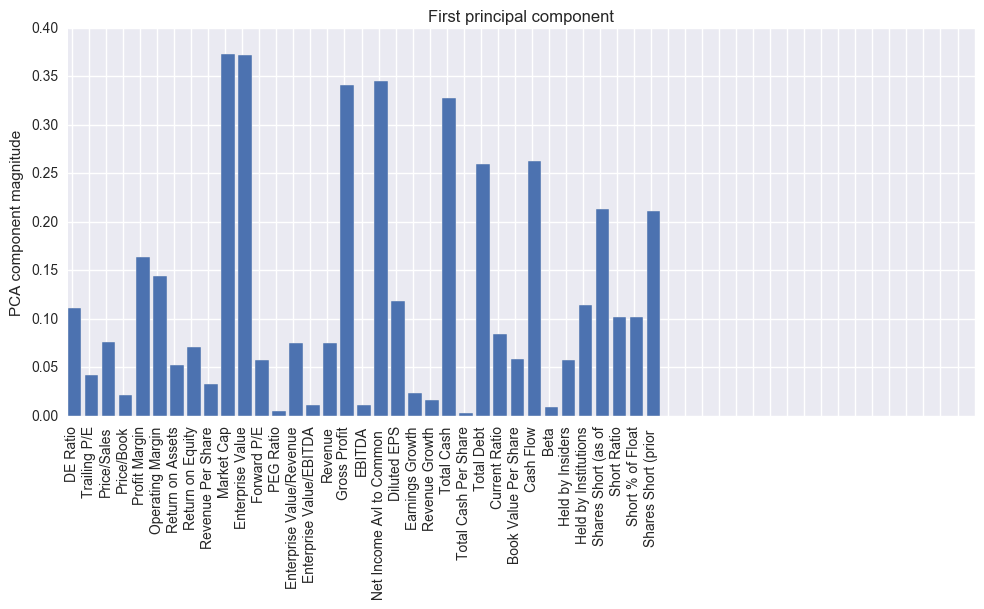

In [69]:
pca_()


In [27]:
from sklearn import svm, datasets, feature_selection
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline


GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.1, 1, 10, 100]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring='accuracy', verbose=0)

/Users/Amir/anaconda/envs/ana42py27/lib/python2.7/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


(LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
           penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
           verbose=0, warm_start=False),
 {'C': 10},
 0.65213032581453634,
 [mean: 0.63208, std: 0.02808, params: {'C': 0.001},
  mean: 0.64612, std: 0.02727, params: {'C': 0.1},
  mean: 0.64812, std: 0.02405, params: {'C': 1},
  mean: 0.65213, std: 0.02741, params: {'C': 10},
  mean: 0.65213, std: 0.02741, params: {'C': 100}])

Pipeline(steps=[('anova', SelectPercentile(percentile=1, score_func=<function f_classif at 0x115b2d9b0>)), ('LogisticRegression', LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

Pipeline(steps=[('anova', SelectPercentile(percentile=3, score_func=<function f_classif at 0x115b2d9b0>)), ('LogisticRegression', LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

Pipeline(steps=[('anova', SelectPercentile(percentile=6, score_func=<function f_classif at 0x115b2d9b0>)), ('LogisticRegression', LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

Pipeline(steps=[('anova', SelectPercentile(percentile=10,
         score_func=<function f_classif at 0x115b2d9b0>)), ('LogisticRegression', LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

Pipeline(steps=[('anova', SelectPercentile(percentile=15,
         score_func=<function f_classif at 0x115b2d9b0>)), ('LogisticRegression', LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

Pipeline(steps=[('anova', SelectPercentile(percentile=20,
         score_func=<function f_classif at 0x115b2d9b0>)), ('LogisticRegression', LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

Pipeline(steps=[('anova', SelectPercentile(percentile=30,
         score_func=<function f_classif at 0x115b2d9b0>)), ('LogisticRegression', LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

Pipeline(steps=[('anova', SelectPercentile(percentile=40,
         score_func=<function f_classif at 0x115b2d9b0>)), ('LogisticRegression', LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

Pipeline(steps=[('anova', SelectPercentile(percentile=60,
         score_func=<function f_classif at 0x115b2d9b0>)), ('LogisticRegression', LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

Pipeline(steps=[('anova', SelectPercentile(percentile=80,
         score_func=<function f_classif at 0x115b2d9b0>)), ('LogisticRegression', LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

Pipeline(steps=[('anova', SelectPercentile(percentile=90,
         score_func=<function f_classif at 0x115b2d9b0>)), ('LogisticRegression', LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

Pipeline(steps=[('anova', SelectPercentile(percentile=100,
         score_func=<function f_classif at 0x115b2d9b0>)), ('LogisticRegression', LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

<Container object of 3 artists>

(-3.9500000000000002, 104.95, 0.55522503590617223, 0.69140283091090637)

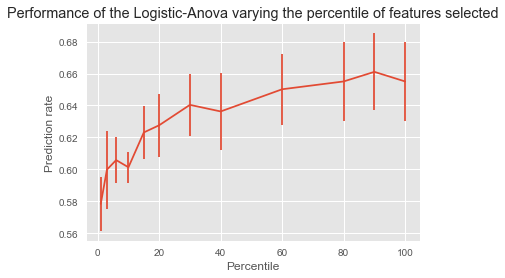

In [29]:
score_means = list()
score_stds = list()
percentiles = (1, 3, 6, 10, 15, 20, 30, 40, 60, 80, 90, 100)

X, y, z = Build_Data_Set()

Xlr, Xtestlr, ylr, ytestlr, zlr, ztestlr = train_test_split(X,y,z)

clfl2=LogisticRegression()
parameters = {"C": [0.001, 0.1, 1, 10,100]}
fitmodel = GridSearchCV(clfl2, param_grid=parameters, cv=5, scoring="accuracy")
fitmodel.fit(Xlr, ylr)
fitmodel.best_estimator_, fitmodel.best_params_, fitmodel.best_score_, fitmodel.grid_scores_

transform = feature_selection.SelectPercentile(feature_selection.f_classif)
#clf = Pipeline([('anova', transform), ('svc', svm.SVC(C=1.0))])
clf = Pipeline([('anova', transform), ('LogisticRegression', LogisticRegression(C=fitmodel.best_params_['C']))])


for percentile in percentiles:
    clf.set_params(anova__percentile=percentile)
    # Compute cross-validation score using 1 CPU
    this_scores = cross_val_score(clf, X, y, cv=5)
    score_means.append(this_scores.mean())
    score_stds.append(this_scores.std())

plt.errorbar(percentiles, score_means, np.array(score_stds))

plt.title(
    'Performance of the Logistic-Anova varying the percentile of features selected')
plt.xlabel('Percentile')
plt.ylabel('Prediction rate')

plt.axis('tight')
plt.show()


In [13]:
from __future__ import print_function, division

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA, NMF
from sklearn.feature_selection import SelectKBest, chi2

Machine learnig with SVM


GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(steps=[('reduce_dim', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('classify', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=2,
       param_grid=[{'classify__C': [1, 10, 100, 1000], 'reduce_dim': [PCA(copy=True, iterated_power=7, n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False), NMF(alpha=0.0, beta=1, eta=0.1, init=None, l1_ratio=0.0, max_iter=200,
  n_components=None, nls_max_iter=2000, random_sta...ectKBest(k=10, score_func=<function chi2 at 0x115b2d8c0>)], 'reduce_dim__k': [2, 4, 8, 12, 28, 35]}],
       pre_dispatch='2*n_jobs', refit=True, return_tra

<Container object of 6 artists>

<Container object of 6 artists>

<Container object of 6 artists>

([<matplotlib.axis.XTick at 0x1200bb510>,
 <a list of 6 Text xticklabel objects>)

(0, 1)

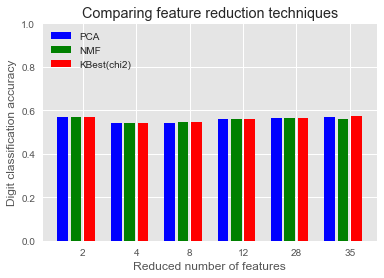

In [25]:
print(__doc__)

pipe = Pipeline([
    ('reduce_dim', PCA()),
    ('classify', LogisticRegression())
])

N_FEATURES_OPTIONS = [2, 4, 8, 12, 28, len(FEATURES)]
C_OPTIONS = [1, 10, 100, 1000]
param_grid = [
    {
        'reduce_dim': [PCA(iterated_power=7), NMF()],
        'reduce_dim__n_components': N_FEATURES_OPTIONS,
        'classify__C': C_OPTIONS
    },
    {
        'reduce_dim': [SelectKBest(chi2)],
        'reduce_dim__k': N_FEATURES_OPTIONS,
        'classify__C': C_OPTIONS
    },
]
reducer_labels = ['PCA', 'NMF', 'KBest(chi2)']


grid = GridSearchCV(pipe, cv=5, n_jobs=2, param_grid=param_grid)

X, y, z = Build_Data_Set()

grid.fit(abs(X), y)

mean_scores = np.array(grid.cv_results_['mean_test_score'])
# scores are in the order of param_grid iteration, which is alphabetical
mean_scores = mean_scores.reshape(len(C_OPTIONS), -1, len(N_FEATURES_OPTIONS))
# select score for best C
mean_scores = mean_scores.max(axis=0)
bar_offsets = (np.arange(len(N_FEATURES_OPTIONS)) *
               (len(reducer_labels) + 1) + .5)

plt.figure()
COLORS = 'bgrcmyk'
for i, (label, reducer_scores) in enumerate(zip(reducer_labels, mean_scores)):
    plt.bar(bar_offsets + i, reducer_scores, label=label, color=COLORS[i])

plt.title("Comparing feature reduction techniques")
plt.xlabel('Reduced number of features')
plt.xticks(bar_offsets + len(reducer_labels) / 2, N_FEATURES_OPTIONS)
plt.ylabel('Digit classification accuracy')
plt.ylim((0, 1))
plt.legend(loc='upper left')
plt.show()


In [21]:
len(FEATURES)

35